In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [3]:
df.shape

(1111742, 30)

In [4]:
df.keys()

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

We are dropping the unnamed column as it is not giving us any insights about the data

In [5]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [6]:
# Checking null values.
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [7]:
# winPlacePerc has only one null value.
df[df['winPlacePerc'].isnull() == True]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
184895,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [8]:
# Finding the corelation within winPlacePerc
w_pl=df.corr()

<AxesSubplot:>

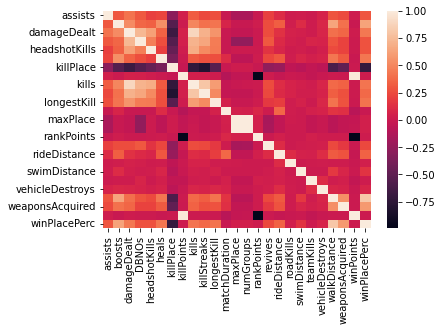

In [9]:
sns.heatmap(w_pl)

In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 29 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               1111742 non-null  object 
 1   groupId          1111742 non-null  object 
 2   matchId          1111742 non-null  object 
 3   assists          1111742 non-null  int64  
 4   boosts           1111742 non-null  int64  
 5   damageDealt      1111742 non-null  float64
 6   DBNOs            1111742 non-null  int64  
 7   headshotKills    1111742 non-null  int64  
 8   heals            1111742 non-null  int64  
 9   killPlace        1111742 non-null  int64  
 10  killPoints       1111742 non-null  int64  
 11  kills            1111742 non-null  int64  
 12  killStreaks      1111742 non-null  int64  
 13  longestKill      1111742 non-null  float64
 14  matchDuration    1111742 non-null  int64  
 15  matchType        1111742 non-null  object 
 16  maxPlace         1

In [12]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [21]:
def detect_outliers(df):
    cols_name = list(df)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols_name:
        if column in df.select_dtypes(include=np.number).columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            low = q1 - (1.5*iqr)
            high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':df.loc[(df[column] < low) | (df[column] > high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df)

,Feature,Number of Outliers
0,assists,194611
1,boosts,35533
2,damageDealt,54026
3,DBNOs,73607
4,headshotKills,187930
5,heals,81625
6,killPlace,0
7,killPoints,0
8,kills,129163
9,killStreaks,13391


# EDA 

### Match type

In [22]:
matches = df.loc[:,"matchId"].nunique()
print("There are {} matches registered in our database.".format(matches))

There are 47951 matches registered in our database.


In [23]:
types = df.loc[:,"matchType"].value_counts().to_frame().reset_index()
types.columns = ["Type","Count"]
types

,Type,Count
0,squad-fpp,438781
1,duo-fpp,249927
2,squad,156573
3,solo-fpp,133854
4,duo,78039
5,solo,45679
6,normal-squad-fpp,4286
7,crashfpp,1581
8,normal-duo-fpp,1400
9,flaretpp,633


three main modes of game: Solo, Duo and Squad.

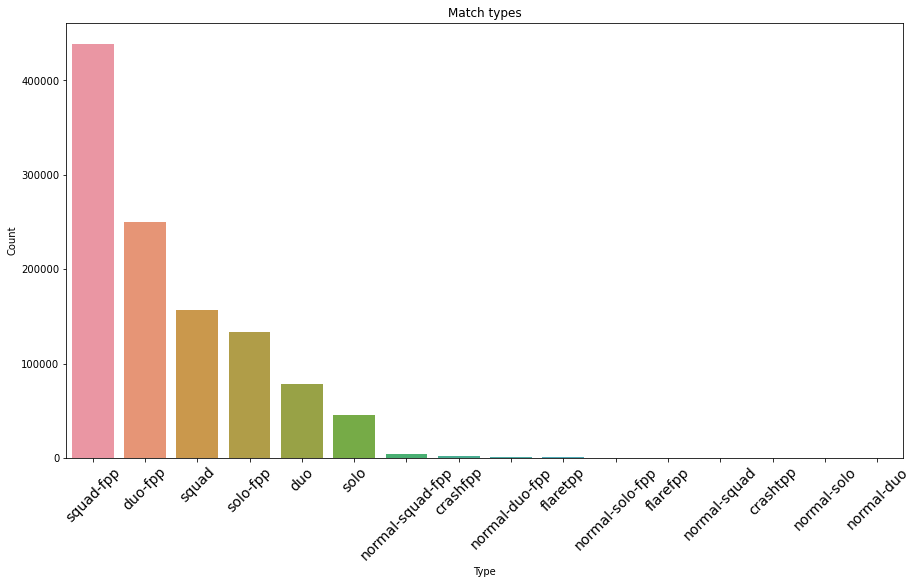

In [25]:
plt.figure(figsize=(15,8))
ticks = types.Type.values
ax = sns.barplot(x="Type", y="Count", data=types)
ax.set_xticklabels(ticks, rotation=45, fontsize=14)
ax.set_title("Match types")
plt.show()

The graph above shows that the most popular game modes are squad and duo

Keep only those players that didn't kill anyone

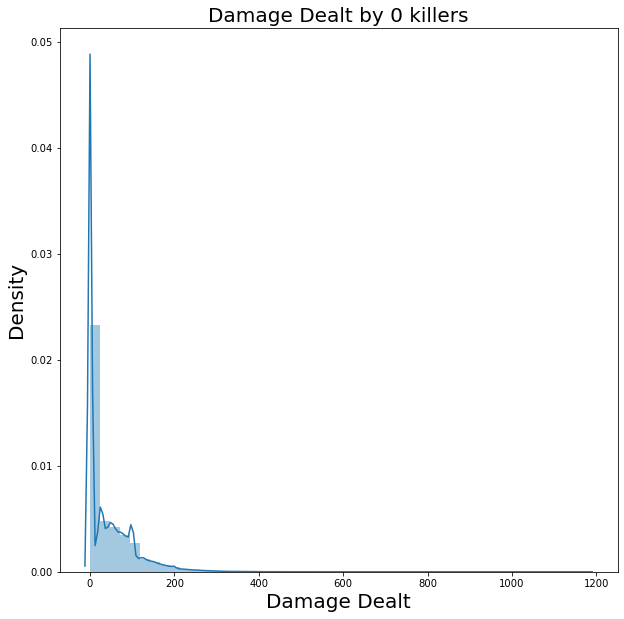

In [29]:
data = df.copy()
data = data[data['kills']==0]
plt.figure(figsize=(10,10))
plt.title('Damage Dealt by 0 killers',fontsize=20)
sns.distplot(data['damageDealt'])
plt.xlabel('Damage Dealt', fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()

### Players that only won the match 

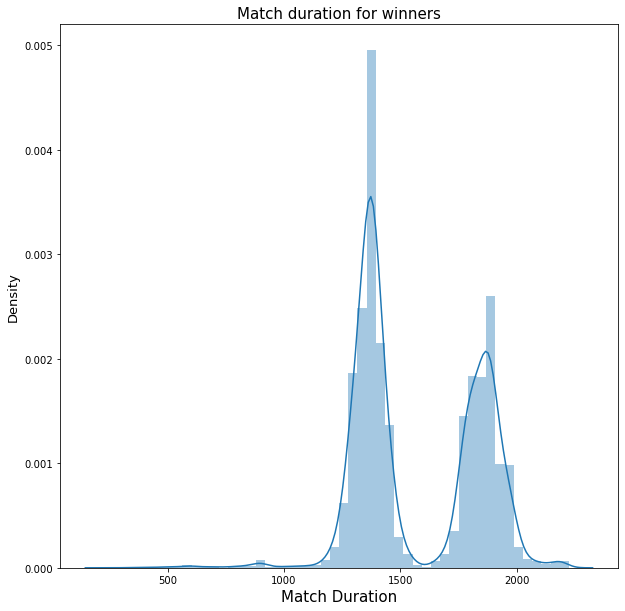

In [30]:
data = df[df['winPlacePerc'] == 1]

plt.figure(figsize=(10,10))
plt.title('Match duration for winners',fontsize=15)
sns.distplot(data['matchDuration'])
plt.xlabel('Match Duration', fontsize=15)
plt.ylabel('Density',fontsize=13)
plt.show()

 The match Duration is not a feature that is likely to be useful in predicting the winPlacePer.

<Figure size 1080x720 with 0 Axes>

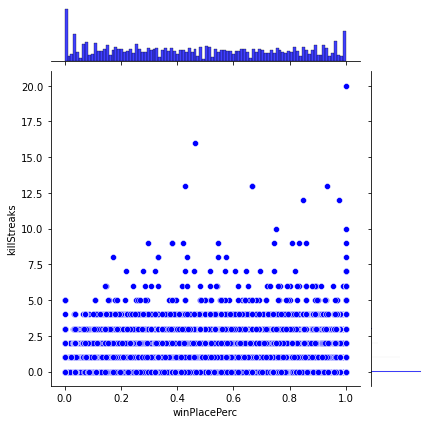

In [31]:
# Bivariante Analysis
plt.figure(figsize=(15,10))
sns.jointplot(x='winPlacePerc', y='killStreaks', data=df, color='b')
# plt.title('Win place vs Kill Streaks')
plt.xlabel('Win Place Prec', fontsize=15)
plt.ylabel('Kill streaks',fontsize=13)
plt.show()

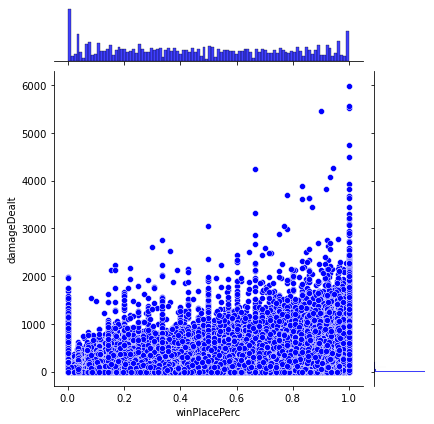

In [32]:
sns.jointplot(x='winPlacePerc', y='damageDealt', data=df, color='b')

In [35]:
# Create a new feature for total distance travelled
data = df[['winPlacePerc']].copy()
data['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']

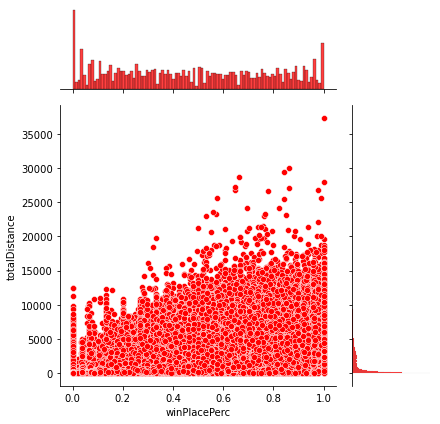

In [36]:
sns.jointplot(x='winPlacePerc', y='totalDistance', data=data, ratio=3, color='r')

Total distance travelled is not an existing feature in the data, but we can combine the distance features to forma a total distance measure, so see if this has any predictive power of our target variable.

<AxesSubplot:>

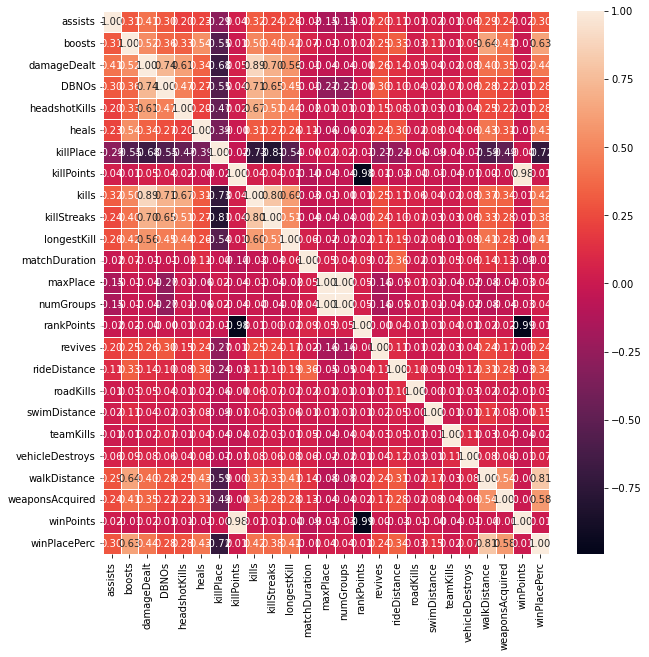

In [34]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

Observations: According to the colorbar we can find the correlation between different features. If correlation is positive, one variable increases with other. If correlation is negative, as one variable increases, the other decreases. if correlation is 1, it means that either the variables are same or they are almost same